In [1]:
import os, sys
sys.path.insert(0, os.path.abspath(".."))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style("whitegrid")

## Importamos la información

In [4]:
path = 's3://inai-summerofdata/mlpreproc/inai.parquet'
df = pd.read_parquet(path, engine='pyarrow')
pd.options.display.max_columns = None

In [5]:
df.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,2012-03-02,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-02,mexico,distrito federal,benito juarez,3100,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,2012-03-02,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-02,mexico,distrito federal,benito juarez,3100,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,inexistencia de la informacion solicitada,el asunto se turno a la direccion general de r...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,miguel hidalgo,11230,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,miguel hidalgo,11230,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,entrega de informacion en medio electronico,None,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-01,mexico,distrito federal,miguel hidalgo,11230,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249668 entries, 0 to 1559008
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   folio                        1249668 non-null  object        
 1   fechasolicitud               1249668 non-null  datetime64[ns]
 2   dependencia                  1249668 non-null  object        
 3   estatus                      1249668 non-null  object        
 4   medioentrada                 1249668 non-null  object        
 5   tiposolicitud                1249668 non-null  object        
 6   descripcionsolicitud         1249668 non-null  object        
 7   otrosdatos                   1249668 non-null  object        
 8   archivoadjuntosolicitud      1249668 non-null  object        
 9   medioentrega                 1249668 non-null  object        
 10  fechalimite                  1138841 non-null  datetime64[ns]
 11  respuesta  

# EDA variable descripcionsolicitud, calidad_respuesta y calidad_respuesta_real

## Número de casos para las etiquetas calidad respuesta y calidad respuesta real

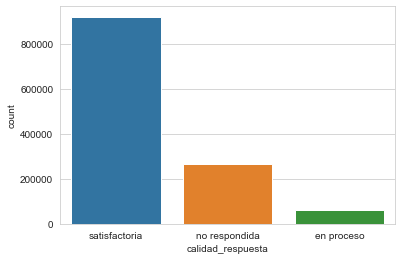

In [7]:
graph = sns.countplot(x="calidad_respuesta", data=df)

In [8]:
grouped = df.groupby('calidad_respuesta').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta,
satisfactoria,"919,856"
no respondida,"267,431"
en proceso,"62,381"


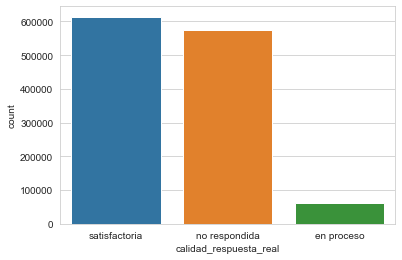

In [9]:
graph = sns.countplot(x="calidad_respuesta_real", data=df)

In [10]:
grouped = df.groupby('calidad_respuesta_real').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta_real', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta_real,
satisfactoria,"614,067"
no respondida,"573,220"
en proceso,"62,381"


## Longitud de la solicitud por categoria de respuesta

In [11]:
df['solicitud_longitud'] = df['descripcionsolicitud'].str.len()

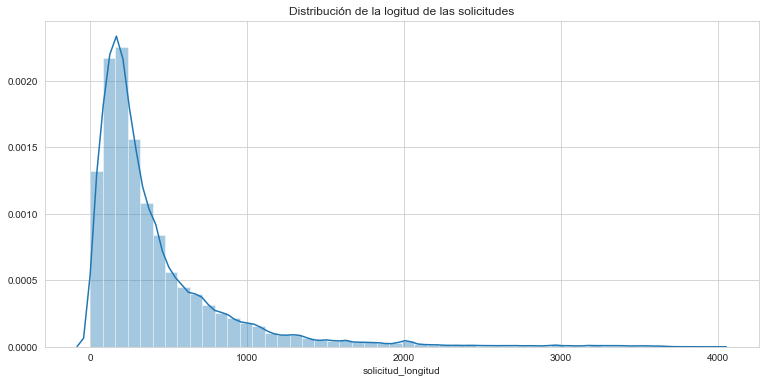

In [12]:
plt.figure(figsize=(12.8, 6))
sns.distplot(df['solicitud_longitud']).set_title('Distribución de la logitud de las solicitudes');

In [13]:
df['solicitud_longitud'].describe()

count    1.249668e+06
mean     4.168609e+02
std      4.639495e+02
min      0.000000e+00
25%      1.470000e+02
50%      2.640000e+02
75%      5.050000e+02
max      3.971000e+03
Name: solicitud_longitud, dtype: float64

Veamos casos con longitud pequeñas para ver que tipo de descripcion de solicitud tienen.

In [14]:
filtro = df['solicitud_longitud'] == 0
long_cero = df[filtro]

In [15]:
long_cero.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
334,0000400003012,2012-01-02 23:12:18,secretaria de gobernacion (incluye la entonces...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,,informacion publica de seguridad y trasporte,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,con respecto a su solicitud nos permitimos inf...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-10,mexico,mexico,nezahualcoyotl,57840,gobernacion,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,0
1288,1857500006412,2012-01-05 20:53:31,pemex exploracion y produccion,terminada,electronica,informacion publica,,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-03,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-03,mexico,tabasco,centro,86039,energia,pdf,1.0,"oficio heme eploracioa y proceon fecha mexico,...",entrega de informacion en medio electronico,satisfactoria,satisfactoria,0
1289,1857500006512,2012-01-05 20:55:51,pemex exploracion y produccion,terminada,electronica,informacion publica,,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-03,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-03,mexico,tabasco,centro,86039,energia,pdf,1.0,"oficio exploracion y produccion fecha mexico, ...",entrega de informacion en medio electronico,satisfactoria,satisfactoria,0
1358,0000500003512,2012-01-06 11:13:52,secretaria de relaciones exteriores,terminada,manual,informacion publica,,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2012-03-05,negativa por ser reservada o confidencial,ver archivo anexo.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-05,mexico,distrito federal,cuauhtemoc,6300,relaciones exteriores,pdf,1.0,direccion general del acervo historico diploma...,negativa por ser reservada o confidencial,no respondida,no respondida,0
2641,1215100002712,2012-01-10 15:06:48,comision federal para la proteccion contra rie...,terminada,electronica,informacion publica,,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-07,entrega de informacion en medio electronico,ver anexo,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-01,mexico,morelos,emiliano zapata,62765,salud,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,0


In [16]:
long_cero['descripcionsolicitud'].count()

2880

In [17]:
filtro = df['solicitud_longitud'] == 1
long_uno = df[filtro]

In [18]:
long_uno.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
25546,0001700054512,2012-03-08 19:04:06,procuraduria general de la republica,terminada,manual,informacion publica,3,3,None,copia simple,2012-04-13,la solicitud no corresponde al marco de la ley,se anexa respuesta en archivo adjunto. favor d...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-04-13,mexico,extranjero,extranjero,3,procuraduria general de la republica,pdf,1.0,None,la solicitud no corresponde al marco de la ley,no respondida,no respondida,1
28389,2510100020512,2012-03-16 15:03:26,administracion federal de servicios educativos...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,x,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,estimado usuario por este conducto nos permiti...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-22,mexico,coahuila,sacramento,27750,previsiones y aportaciones para los sistemas d...,zip,2.0,None,requerimiento de informacion adicional,en proceso,en proceso,1
49171,2510100032012,2012-05-15 22:52:02,administracion federal de servicios educativos...,terminada,electronica,informacion publica,g,None,None,entrega por internet en el infomex,2012-07-02,entrega de informacion en medio electronico,None,https://www.infomex.org.mx/gobiernofederal/mod...,2012-06-07,mexico,chihuahua,delicias,33066,previsiones y aportaciones para los sistemas d...,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,1
74861,0410000002513,2013-01-27 04:37:35,centro de investigacion y seguridad nacional,terminada,electronica,informacion publica,a,None,None,entrega por internet en el infomex,2013-02-25,la solicitud no corresponde al marco de la ley,se anexa archivo.,https://www.infomex.org.mx/gobiernofederal/mod...,2013-01-28,mexico,chiapas,tapachula,30780,gobernacion,pdf,1.0,None,la solicitud no corresponde al marco de la ley,no respondida,no respondida,1
120733,0002000067213,2013-05-14 14:04:48,secretaria de desarrollo social,terminada,electronica,informacion publica,),None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2013-06-11,entrega de informacion en medio electronico,se remite informacion en archivo electronico a...,https://www.infomex.org.mx/gobiernofederal/mod...,2013-06-11,mexico,hidalgo,ixmiquilpan,42302,desarrollo social,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,1


In [19]:
long_uno['descripcionsolicitud'].count()

170

In [20]:
filtro = df['solicitud_longitud'] == 2
long_dos = df[filtro]

In [21]:
long_dos.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
2094,1222300000512,2012-01-09 14:20:44,instituto nacional de enfermedades respiratorias,terminada,electronica,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2012-02-07,entrega de informacion en medio electronico,se anexa carpeta zip con archivos en el oficio...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-07,mexico,distrito federal,azcapotzalco,2480,salud,zip,9.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,2
3246,0000900010312,2012-01-11 21:00:31,secretaria de comunicaciones y transportes,terminada,electronica,informacion publica,se,si la secretaria de comunicaciones y transport...,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-09,entrega de informacion en medio electronico,ver archivo adjunto,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-06,mexico,tamaulipas,tampico,89120,comunicaciones y transportes,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,2
3402,0001600012712,2012-01-12 11:09:55,secretaria de medio ambiente y recursos naturales,terminada,electronica,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-09,no es de competencia de la unidad de enlace,@de acuerdo a la informacion que solicita le s...,None,2012-01-13,mexico,distrito federal,benito juarez,3100,medio ambiente y recursos naturales,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,2
3427,0000700009312,2012-01-12 11:40:53,secretaria de la defensa nacional,terminada,electronica,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-09,entrega de informacion en medio electronico,se envia respuesta en archivo electronico.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-01,mexico,distrito federal,benito juarez,3100,defensa nacional,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,2
3429,2009000000112,2012-01-12 11:45:20,comision nacional de zonas aridas,terminada,electronica,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-09,no es de competencia de la unidad de enlace,16161,None,2012-01-12,mexico,distrito federal,benito juarez,3100,"agricultura, ganaderia, desarrollo rural, pesc...",None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,2


In [22]:
long_dos.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1549689,1113100056219,2019-12-09 14:24:58,comision nacional de cultura fisica y deporte ...,en proceso,electronica,informacion publica,se,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-22,sin respuesta,None,None,2019-12-09,mexico,nan,nan,nan,educacion publica,None,NaN,None,sin respuesta,no respondida,no respondida,2
1552015,0000400432719,2019-12-12 16:45:20,secretaria de gobernacion (segob),terminada,electronica,informacion publica,el,sueldo presidente,None,consulta directa,2020-01-27,no es de competencia de la unidad de enlace,@estimado(a) solicitante p r e s e n t e nos r...,None,2019-12-17,mexico,baja california sur,comondu,23854.0,gobernacion,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,2
1555625,0001600528719,2019-12-19 11:44:51,secretaria de medio ambiente y recursos natura...,en proceso,electronica,informacion publica,se,se encuentra en la direccion general de zona f...,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-02-03,sin respuesta,None,None,2019-12-19,mexico,mexico,naucalpan de juarez,53427.0,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,2
1556003,0610100313319,2019-12-19 18:58:08,servicio de administracion tributaria (sat),en proceso,manual,informacion publica,se,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-03,sin respuesta,None,None,2019-12-19,mexico,ciudad de mexico,venustiano carranza,15530.0,hacienda y credito publico,None,NaN,None,sin respuesta,no respondida,no respondida,2
1557602,0001700001220,2019-12-26 12:47:50,fiscalia general de la republica (antes pgr),en proceso,manual,informacion publica,se,None,None,otro medio,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,ciudad de mexico,alvaro obregon,1040.0,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,2


In [23]:
long_dos['descripcionsolicitud'].count()

2196

In [24]:
filtro = df['solicitud_longitud'] == 3
long_tres = df[filtro]

In [25]:
long_tres.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
18465,1111500006712,2012-02-21 13:10:01,colegio de bachilleres,terminada,electronica,informacion publica,mmm,mmm,None,entrega por internet en el infomex,2012-03-21,no se dara tramite a la solicitud,dado que en su solicitud solo indica mmm y no ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-22,mexico,chihuahua,chihuahua,31136,educacion publica,doc,1.0,None,no se dara tramite a la solicitud,no respondida,no respondida,3
18604,1800100005912,2012-02-21 16:34:42,comision nacional de hidrocarburos,terminada,electronica,informacion publica,st3,None,None,entrega por internet en el infomex,2012-03-21,no se dara tramite a la solicitud,buenas tardes mediante la presente me permito ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-01,mexico,tamaulipas,reynosa,88522,energia,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,3
21433,0064100607912,2012-02-28 13:49:23,instituto mexicano del seguro social,desechada por falta de respuesta del ciudadano,electronica,informacion publica,pds,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,ver archivo adjunto,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-13,mexico,baja california,tijuana,22120,aportaciones a seguridad social,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,3
37768,0063700135512,2012-04-12 23:05:31,instituto de seguridad y servicios sociales de...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,los,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,en archivo anexo encontrara nuestra peticion d...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-04-16,mexico,jalisco,guadalajara,44270,aportaciones a seguridad social,pdf,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,3
41056,0063500032212,2012-04-21 19:26:01,instituto del fondo nacional de la vivienda pa...,terminada,electronica,informacion publica,sar,None,None,entrega por internet en el infomex,2012-05-22,no se dara tramite a la solicitud,no formulo pregunta alguna.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-04-23,mexico,veracruz,veracruz,91809,ninguno,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,3


In [26]:
long_tres.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1506576,0063700706119,2019-10-16 17:15:16,instituto de seguridad y servicios sociales de...,terminada,electronica,informacion publica,obj,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-11-14,entrega de informacion en medio electronico,en archivo adjunto encontrara respuesta a su s...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-14,mexico,nan,nan,nan,aportaciones a seguridad social,zip,104.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,3
1506577,0001200436219,2019-10-16 17:15:16,secretaria de salud (ssa),terminada,electronica,informacion publica,obj,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-11-14,no es de competencia de la unidad de enlace,@estimable solicitante. con fundamento en lo d...,None,2019-10-24,mexico,nan,nan,nan,salud,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,3
1506578,0715000025819,2019-10-16 17:15:16,instituto de seguridad social para las fuerzas...,terminada,electronica,informacion publica,obj,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-11-14,entrega de informacion en medio electronico,se adjunta archivo,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-04,mexico,nan,nan,nan,aportaciones a seguridad social,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,3
1506579,0064103050319,2019-10-16 17:15:16,instituto mexicano del seguro social (imss),terminada,electronica,informacion publica,obj,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-11-14,entrega de informacion en medio electronico,favor de consultar archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-14,mexico,nan,nan,nan,aportaciones a seguridad social,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,3
1510705,0000900418419,2019-10-21 22:07:56,secretaria de comunicaciones y transportes (sct),terminada,electronica,informacion publica,sct,sct,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-11-21,entrega de informacion en medio electronico,apreciable solicitante: en atencion a su solic...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-21,mexico,nan,nan,nan,comunicaciones y transportes,zip,4.0,None,sin respuesta,satisfactoria,no respondida,3


In [27]:
long_tres['descripcionsolicitud'].count()

92

In [28]:
filtro = df['solicitud_longitud'] == 4
long_cuatro = df[filtro]

In [29]:
long_cuatro.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
495,0917900000512,2012-01-03 13:17:44,administracion portuaria integral de manzanill...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,nada,nada,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,con la finalidad de poder proporcionarle un me...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-05,mexico,guanajuato,allende,37730,comunicaciones y transportes,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,4
4638,2012000000712,2012-01-16 20:14:22,comision nacional de vivienda,terminada,electronica,informacion publica,st-4,None,None,entrega por internet en el infomex,2012-02-14,no es de competencia de la unidad de enlace,641,None,2012-01-19,mexico,baja california,tijuana,22215,hacienda y credito publico,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,4
12755,0000700020812,2012-02-06 03:02:45,secretaria de la defensa nacional,desechada por falta de respuesta del ciudadano,electronica,informacion publica,obra,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,se adjunta requerimiento de informacion adicio...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-09,mexico,distrito federal,cuauhtemoc,6300,defensa nacional,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,4
12756,1610100020212,2012-02-06 03:10:51,comision nacional del agua,desechada por falta de respuesta del ciudadano,electronica,informacion publica,obra,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,estimado ciudadano atentamente le sugerimos de...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-07,mexico,distrito federal,cuauhtemoc,6300,medio ambiente y recursos naturales,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,4
12757,1816400022412,2012-02-06 03:12:41,comision federal de electricidad,desechada por falta de respuesta del ciudadano,electronica,informacion publica,obra,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,para atender debidamente su solicitud y brinda...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-08,mexico,distrito federal,cuauhtemoc,6300,energia,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,4


In [30]:
long_cuatro.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1491392,0917400007419,2019-09-30 19:09:59,administracion portuaria integral de topolobam...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,hrhr,nan,None,otro medio,NaT,requerimiento de informacion adicional,estimado solicitante su requerimiento de infor...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-10-01,mexico,nan,nan,nan,comunicaciones y transportes,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,4
1501963,1154900002019,2019-10-11 12:14:34,conacyt-fondo mixto de fomento a la investigac...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,rcea,None,None,consulta directa,NaT,requerimiento de informacion adicional,en alcance a la solicitud recibida con no. de ...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-10-11,mexico,queretaro,corregidora,76900.0,ninguno,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,4
1519294,0675000279319,2019-10-31 14:33:38,loteria nacional para la asistencia publica (l...,en proceso con prorroga,electronica,informacion publica,....,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-13,notificacion de prorroga,se anexa prorroga,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-04,mexico,ciudad de mexico,cuauhtemoc,6030.0,hacienda y credito publico,zip,2.0,None,notificacion de prorroga,en proceso,en proceso,4
1531634,1221000014919,2019-11-13 17:41:49,hospital regional de alta especialidad del bajio,terminada,electronica,informacion publica,efwe,qww,None,consulta directa,2019-12-12,no se dara tramite a la solicitud,buen dia me permito informar a usted que su pe...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-15,mexico,yucatan,merida,97246.0,salud,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,4
1550162,0064200006819,2019-12-10 08:59:56,imss-fideicomiso de administracion de teatros ...,terminada,electronica,informacion publica,imss,toluca,None,entrega por internet en la pnt,2020-01-23,no es de competencia de la unidad de enlace,641,None,2019-12-11,mexico,mexico,toluca,50250.0,ninguno,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,4


In [31]:
long_cuatro['descripcionsolicitud'].count()

153

In [32]:
filtro = df['solicitud_longitud'] == 5
long_cinco = df[filtro]

In [33]:
long_cinco.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
12968,0064100387112,2012-02-07 11:14:51,instituto mexicano del seguro social,terminada,electronica,informacion publica,copia,None,None,copia certificada,2012-03-06,entrega de informacion en medio electronico,en atencion a su solicitud nos permitimos noti...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-05,mexico,distrito federal,gustavo a. madero,7090,aportaciones a seguridad social,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,5
15023,1112100000612,2012-02-12 13:26:42,centro de ingenieria y desarrollo industrial,desechada por falta de respuesta del ciudadano,electronica,informacion publica,becas,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,por medio del presente y en relacion con el co...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-14,mexico,chihuahua,hidalgo del parral,33860,consejo nacional de ciencia y tecnologia,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,5
49673,0002200096612,2012-05-16 20:49:54,secretaria de seguridad publica (ahora incorpo...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,curso,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,mexico distrito federal a 31 de mayo de 2012. ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-05-31,mexico,distrito federal,cuauhtemoc,6760,seguridad publica,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,5
56358,0002000061712,2012-06-04 20:33:09,secretaria de desarrollo social,terminada,electronica,informacion publica,cluni,registrarnos como asociacion civil para obtene...,None,entrega por internet en el infomex,2012-07-03,entrega de informacion en medio electronico,se adjunta respuesta en archivo electronico,https://www.infomex.org.mx/gobiernofederal/mod...,2012-07-03,mexico,mexico,tenango del valle,52300,desarrollo social,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,5
73637,1816400025113,2013-01-23 21:29:16,comision federal de electricidad,terminada,electronica,informacion publica,se el,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2013-04-02,entrega de informacion en medio electronico,se anexan 3 archivos,https://www.infomex.org.mx/gobiernofederal/mod...,2013-03-26,mexico,nuevo leon,monterrey,64320,energia,zip,3.0,None,sin respuesta,satisfactoria,no respondida,5


In [34]:
long_cinco.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1452195,0000800270619,2019-05-29 23:15:04,secretaria de agricultura y desarrollo rural,terminada,electronica,informacion publica,aenxa,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-07-22,notificacion de envio,numero de guia:000000000<br>fecha de envio:05/...,None,2019-07-09,mexico,veracruz,coatzacoalcos,96400.0,"agricultura, ganaderia, desarrollo rural, pesc...",None,NaN,None,notificacion de envio,satisfactoria,satisfactoria,5
1489263,0917500008419,2019-09-27 20:08:43,administracion portuaria integral de tuxpan s....,desechada por falta de respuesta del ciudadano,electronica,informacion publica,rthrt,rtgbrt,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,estimado ciudadano solicitante: en archivo adj...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-09-30,mexico,jalisco,zapopan,45136.0,comunicaciones y transportes,zip,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,5
1501126,0064102992319,2019-10-10 14:33:20,instituto mexicano del seguro social (imss),desechada por falta de respuesta del ciudadano,electronica,informacion publica,en el,nan,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,favor de consultar el archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,2019-10-16,mexico,nan,nan,nan,aportaciones a seguridad social,pdf,1.0,gobierno de e] | o unidad de transparencia ciu...,requerimiento de informacion adicional,en proceso,en proceso,5
1530797,1100200007819,2019-11-13 09:52:01,sep-coordinacion general @prende.mx (*),terminada,electronica,informacion publica,becas,manejo de becas,None,entrega por internet en la pnt,2019-12-12,no es de competencia de la unidad de enlace,11,None,2019-11-13,mexico,jalisco,tonala,45406.0,ninguno,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,5
1530843,1132100010619,2019-11-13 10:10:48,instituto mexicano de la radio,desechada por falta de respuesta del ciudadano,electronica,informacion publica,ganan,nan,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,estimada ciudadana: le solicitamos de la maner...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-14,mexico,nan,nan,nan,educacion publica,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,5


In [35]:
long_cinco['descripcionsolicitud'].count()

182

In [36]:
filtro = df['solicitud_longitud'] == 6
long_seis = df[filtro]

In [37]:
long_seis.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
21070,0912100017612,2012-02-27 18:44:25,instituto federal de telecomunicaciones hasta ...,terminada,electronica,informacion publica,prueba,prueba,None,entrega por internet en el infomex,2012-03-28,no se dara tramite a la solicitud,dado que no se trata de una solicitud de infor...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-06,mexico,distrito federal,cuajimalpa de morelos,5120,comunicaciones y transportes,None,NaN,None,no se dara tramite a la solicitud,no respondida,no respondida,6
21081,0000700034512,2012-02-27 19:04:23,secretaria de la defensa nacional,desechada por falta de respuesta del ciudadano,electronica,informacion publica,sedena,celular,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,se adjunta requerimiento de informacion adicio...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-01,mexico,colima,manzanillo,28830,defensa nacional,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,6
21543,0063700077012,2012-02-28 17:00:16,instituto de seguridad y servicios sociales de...,desechada por falta de respuesta del ciudadano,manual,informacion publica,anexo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,NaT,notificacion de disponibilidad de informacion,ver archivo anexo.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-27,mexico,distrito federal,benito juarez,3100,aportaciones a seguridad social,pdf,1.0,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,6
25746,0000400049912,2012-03-09 11:27:22,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,anexo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-04-16,entrega de informacion en medio electronico,estimado solicitante: sirvase encontrar anexo ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-04-02,mexico,distrito federal,coyoacan,4909,gobernacion,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,6
25748,0000900064012,2012-03-09 11:28:22,secretaria de comunicaciones y transportes,terminada,electronica,informacion publica,anexo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-04-16,no es de competencia de la unidad de enlace,9121,None,2012-03-13,mexico,distrito federal,coyoacan,4909,comunicaciones y transportes,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,6


In [38]:
long_seis.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1526313,0610100268819,2019-11-08 13:44:25,servicio de administracion tributaria (sat),desechada por falta de respuesta del ciudadano,electronica,informacion publica,prueba,nan,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,estimado solicitante: en archivo adjunto encon...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-11,mexico,nan,nan,nan,hacienda y credito publico,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,6
1530675,1857500161219,2019-11-12 22:38:03,pemex exploracion y produccion,en proceso,electronica,informacion publica,archvo,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-11-12,mexico,tamaulipas,ciudad madero,89510.0,energia,None,NaN,None,sin respuesta,no respondida,no respondida,6
1535370,0917900025319,2019-11-20 15:16:41,administracion portuaria integral de manzanill...,terminada,electronica,informacion publica,prueba,nan,None,entrega por internet en la pnt,2019-12-18,no es de competencia de la unidad de enlace,@ayuntamiento de manzanillo,None,2019-11-20,mexico,nan,nan,nan,comunicaciones y transportes,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,6
1535750,0000500358219,2019-11-20 18:37:46,secretaria de relaciones exteriores (sre),terminada,manual,informacion publica,anexo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-12-17,entrega de informacion en medio electronico,se adjunta archivo electronico.,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-16,mexico,ciudad de mexico,cuauhtemoc,6100.0,relaciones exteriores,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,6
1546625,1407500014019,2019-12-04 13:38:34,comision nacional de los salarios minimos,terminada,electronica,informacion publica,prueba,nan,None,entrega por internet en la pnt,2020-01-17,entrega de informacion en medio electronico,None,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-16,mexico,nan,nan,nan,trabajo y prevision social,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,6


In [39]:
long_seis['descripcionsolicitud'].count()

490

In [40]:
filtro = df['solicitud_longitud'] == 7
long_siete = df[filtro]

In [41]:
long_siete.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
2661,0000900009012,2012-01-10 15:30:03,secretaria de comunicaciones y transportes,desechada por falta de respuesta del ciudadano,manual,informacion publica,adjunto,ver archivo adjunto,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,NaT,notificacion de disponibilidad de informacion,se envia formato de pago al domicilio del soli...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-08,mexico,guanajuato,leon,37125,comunicaciones y transportes,pdf,1.0,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,7
3428,1615100002612,2012-01-12 11:44:19,comision nacional de areas naturales protegidas,terminada,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-09,no es de competencia de la unidad de enlace,@estimado solicitante: hago de su conocimiento...,None,2012-01-17,mexico,distrito federal,benito juarez,3100,medio ambiente y recursos naturales,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,7
5122,0001400003912,2012-01-18 11:36:55,secretaria del trabajo y prevision social,terminada,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-16,entrega de informacion en medio electronico,ver archivo anexo,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-16,mexico,distrito federal,tlalpan,14000,trabajo y prevision social,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,7
5128,0001400004112,2012-01-18 11:42:36,secretaria del trabajo y prevision social,terminada,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-16,notificacion lugar y fecha de entrega,lugar para obtener la informacion:estimado sol...,None,2012-03-05,mexico,distrito federal,tlalpan,14000,trabajo y prevision social,None,NaN,None,notificacion lugar y fecha de entrega,satisfactoria,satisfactoria,7
5133,0001400004212,2012-01-18 11:44:58,secretaria del trabajo y prevision social,terminada,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-16,notificacion lugar y fecha de entrega,lugar para obtener la informacion:estimado sol...,None,2012-03-05,mexico,distrito federal,tlalpan,14000,trabajo y prevision social,None,NaN,None,notificacion lugar y fecha de entrega,satisfactoria,satisfactoria,7


In [42]:
long_siete.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1550017,0210000368319,2019-12-09 19:24:45,oficina de la presidencia de la republica,en proceso,electronica,informacion publica,adjunto,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-23,sin respuesta,None,None,2019-12-09,mexico,nan,nan,nan,presidencia de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,7
1550018,0002700437519,2019-12-09 19:24:45,secretaria de la funcion publica (sfp),terminada,electronica,informacion publica,adjunto,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-23,entrega de informacion en medio electronico,entrega de informacion por medio del presente ...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-17,mexico,nan,nan,nan,funcion publica,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,7
1552261,0000400433119,2019-12-13 10:36:10,secretaria de gobernacion (segob),en proceso,manual,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-01-28,sin respuesta,None,None,2019-12-13,mexico,ciudad de mexico,cuauhtemoc,0.0,gobernacion,None,NaN,None,sin respuesta,no respondida,no respondida,7
1553276,0000700377919,2019-12-16 10:54:11,secretaria de la defensa nacional (sedena),en proceso,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-29,sin respuesta,None,None,2019-12-16,mexico,sinaloa,culiacan,80028.0,defensa nacional,None,NaN,None,sin respuesta,no respondida,no respondida,7
1553534,0001700572019,2019-12-16 13:54:52,fiscalia general de la republica (antes pgr),en proceso,electronica,informacion publica,adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-29,sin respuesta,None,None,2019-12-16,mexico,jalisco,zapopan,45019.0,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,7


In [43]:
long_siete['descripcionsolicitud'].count()

1863

In [44]:
filtro = df['solicitud_longitud'] == 8
long_ocho = df[filtro]

In [45]:
long_ocho.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
5688,1610100011212,2012-01-19 12:50:19,comision nacional del agua,desechada por falta de respuesta del ciudadano,electronica,informacion publica,mediante,por correo electronico,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,estimado ciudadano por favor le sugerimos que ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-19,mexico,distrito federal,iztapalapa,9670,medio ambiente y recursos naturales,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,8
8166,0918200000912,2012-01-25 20:23:19,administracion portuaria integral de veracruz ...,terminada,electronica,informacion publica,klsjdflk,lkjdl,None,entrega por internet en el infomex,2012-02-23,la solicitud no corresponde al marco de la ley,no corresopnde al marco de la ley toda vez que...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-30,mexico,distrito federal,alvaro obregon,1180,comunicaciones y transportes,None,NaN,None,la solicitud no corresponde al marco de la ley,no respondida,no respondida,8
9112,0001200025112,2012-01-27 17:45:10,secretaria de salud,terminada,manual,informacion publica,favor de,mismo archivo anexo,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2012-02-24,entrega de informacion en medio electronico,favor de ver el archivo anexo.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-23,mexico,distrito federal,miguel hidalgo,11590,salud,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,8
9535,0945100001812,2012-01-30 13:57:27,aeropuerto internacional de la ciudad de mexic...,terminada,electronica,informacion publica,adjunto.,ver archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-28,negativa por ser reservada o confidencial,se anexan escritos de la unidad administrativa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-16,mexico,distrito federal,alvaro obregon,1040,comunicaciones y transportes,zip,3.0,None,negativa por ser reservada o confidencial,no respondida,no respondida,8
9538,0945100001912,2012-01-30 14:00:48,aeropuerto internacional de la ciudad de mexic...,terminada,electronica,informacion publica,adjunto.,ver archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-28,entrega de informacion en medio electronico,mexico d.f. a 16 de febrero de 2012 aeropuerto...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-16,mexico,distrito federal,alvaro obregon,1040,comunicaciones y transportes,zip,3.0,None,sin respuesta,satisfactoria,no respondida,8


In [46]:
long_ocho.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1551098,0917900026219,2019-12-11 12:10:43,administracion portuaria integral de manzanill...,en proceso,electronica,informacion publica,adjuntos,solicitud de datos adjunta,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-24,sin respuesta,None,None,2019-12-11,mexico,nan,nan,nan,comunicaciones y transportes,None,NaN,None,sin respuesta,no respondida,no respondida,8
1551099,0917900026319,2019-12-11 12:11:13,administracion portuaria integral de manzanill...,en proceso,electronica,informacion publica,adjuntos,solicitud de datos adjunta,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-24,sin respuesta,None,None,2019-12-11,mexico,nan,nan,nan,comunicaciones y transportes,None,NaN,None,sin respuesta,no respondida,no respondida,8
1551823,0064103654719,2019-12-12 13:00:56,instituto mexicano del seguro social (imss),en proceso,manual,informacion publica,peticion,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2020-01-27,sin respuesta,None,None,2019-12-12,mexico,ciudad de mexico,cuauhtemoc,0.0,aportaciones a seguridad social,None,NaN,None,sin respuesta,no respondida,no respondida,8
1553692,0064103677319,2019-12-16 16:20:35,instituto mexicano del seguro social (imss),en proceso,manual,informacion publica,peticion,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2020-01-29,sin respuesta,None,None,2019-12-16,mexico,ciudad de mexico,cuauhtemoc,0.0,aportaciones a seguridad social,None,NaN,None,sin respuesta,no respondida,no respondida,8
1556016,0000600572519,2019-12-19 20:21:53,secretaria de hacienda y credito publico (shcp),en proceso,electronica,informacion publica,favor de,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-04,sin respuesta,None,None,2019-12-19,mexico,ciudad de mexico,coyoacan,4918.0,hacienda y credito publico,None,NaN,None,sin respuesta,no respondida,no respondida,8


In [47]:
long_ocho['descripcionsolicitud'].count()

931

In [48]:
filtro = df['solicitud_longitud'] == 9
long_nueve = df[filtro]

In [49]:
long_nueve.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1294,1857500006612,2012-01-05 21:10:18,pemex exploracion y produccion,terminada,electronica,informacion publica,se anaexa,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-03,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-27,mexico,tabasco,centro,86039,energia,pdf,1.0,oficio exploracion produccion (r fecha enero 1...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,9
2145,1816400007412,2012-01-09 16:17:36,comision federal de electricidad,desechada por falta de respuesta del ciudadano,manual,informacion publica,se oficio,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia simple,NaT,notificacion de disponibilidad de informacion,se envia recibo de pago por concepto de un dis...,None,2012-03-21,mexico,distrito federal,miguel hidalgo,11000,energia,None,NaN,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,9
2151,1112000000212,2012-01-09 16:27:58,el colegio de mexico a.c.,terminada,electronica,informacion publica,solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-06,entrega de informacion en medio electronico,None,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-05,mexico,distrito federal,magdalena contreras la,10369,educacion publica,pdf,1.0,i. presupuesto 1.- solicito me informe los tip...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,9
4567,1816400010312,2012-01-16 17:34:11,comision federal de electricidad,terminada,manual,informacion publica,se oficio,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia simple,2012-03-13,negativa por ser reservada o confidencial,se anexan 2 archivos,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-29,mexico,distrito federal,cuauhtemoc,6700,energia,zip,2.0,None,negativa por ser reservada o confidencial,no respondida,no respondida,9
5431,0413100006612,2012-01-18 18:01:47,policia federal antes policia federal preventiva,terminada,electronica,informacion publica,documento,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-16,entrega de informacion en medio electronico,ver archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-06,mexico,chihuahua,juarez,32696,seguridad publica,pdf,1.0,oficina de la comisionada general direccion ge...,sin respuesta,satisfactoria,no respondida,9


In [50]:
long_nueve.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1546093,0002000331419,2019-12-03 20:04:49,secretaria de bienestar,terminada,manual,informacion publica,se remite,None,None,entrega por internet en la pnt,2020-01-16,entrega de informacion en medio electronico,se remite informacion en archivo electronico a...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-12,mexico,ciudad de mexico,benito juarez,3100.0,desarrollo social,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,9
1553980,0001700572519,2019-12-16 20:33:37,fiscalia general de la republica (antes pgr),en proceso,electronica,informacion publica,solciitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-30,sin respuesta,None,None,2019-12-16,mexico,nan,nan,nan,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,9
1556653,1816400000420,2019-12-21 02:40:32,comision federal de electricidad (cfe),en proceso,electronica,informacion publica,solciitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-21,mexico,nan,nan,nan,energia,None,NaN,None,sin respuesta,no respondida,no respondida,9
1556654,0002700000420,2019-12-21 02:40:32,secretaria de la funcion publica (sfp),en proceso,electronica,informacion publica,solciitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-21,mexico,nan,nan,nan,funcion publica,None,NaN,None,sin respuesta,no respondida,no respondida,9
1558328,1236000000820,2019-12-28 00:52:32,sistema nacional para el desarrollo integral d...,en proceso,electronica,informacion publica,solicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-02-05,sin respuesta,None,None,2019-12-28,mexico,nan,nan,nan,salud,None,NaN,None,sin respuesta,no respondida,no respondida,9


In [51]:
long_nueve['descripcionsolicitud'].count()

1947

In [52]:
filtro = df['solicitud_longitud'] == 10
long_diez = df[filtro]

In [53]:
long_diez.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
6325,0610100010412,2012-01-20 18:22:15,servicio de administracion tributaria,desechada por falta de respuesta del ciudadano,manual,informacion publica,se adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,NaT,requerimiento de informacion adicional,estimado solicitante: en archivo adjunto encon...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,coyoacan,4230,hacienda y credito publico,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,10
7870,0000400016812,2012-01-25 14:42:33,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,ejecutoria,ejecutoria de la queja numero 12/2006 director...,None,entrega por internet en el infomex,2012-02-22,no es de competencia de la unidad de enlace,@estimado solicitante: en referencia a su peti...,None,2012-01-27,mexico,baja california,mexicali,21000,gobernacion,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,10
11895,1117100007212,2012-02-03 09:02:40,instituto politecnico nacional,desechada por falta de respuesta del ciudadano,electronica,informacion publica,reglamento,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,ver archivo adjunto en donde se le requiere pr...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-17,mexico,distrito federal,iztapalapa,9100,educacion publica,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,10
16111,0413100027112,2012-02-14 19:11:03,policia federal antes policia federal preventiva,desechada por falta de respuesta del ciudadano,electronica,informacion publica,xxxxxxxxxx,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,NaT,notificacion de disponibilidad de informacion,None,None,2012-03-13,mexico,mexico,naucalpan de juarez,53297,seguridad publica,None,NaN,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,10
16732,0416000003712,2012-02-15 20:54:50,consejo nacional de poblacion,desechada por falta de respuesta del ciudadano,electronica,informacion publica,vialidades,gastos y licencias,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,falta la pregunta y especificar cual es la inf...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-21,mexico,baja california,ensenada,22940,gobernacion,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,10


In [54]:
long_diez.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1556660,1816400000920,2019-12-21 03:18:35,comision federal de electricidad (cfe),en proceso,electronica,informacion publica,sillicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-21,mexico,nan,nan,nan,energia,None,NaN,None,sin respuesta,no respondida,no respondida,10
1556661,0001400000220,2019-12-21 03:18:35,secretaria del trabajo y prevision social,en proceso,electronica,informacion publica,sillicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-21,mexico,nan,nan,nan,trabajo y prevision social,None,NaN,None,sin respuesta,no respondida,no respondida,10
1556662,0063700000520,2019-12-21 03:18:35,instituto de seguridad y servicios sociales de...,en proceso,electronica,informacion publica,sillicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-21,mexico,nan,nan,nan,aportaciones a seguridad social,None,NaN,None,sin respuesta,no respondida,no respondida,10
1556663,0001200000420,2019-12-21 03:18:35,secretaria de salud (ssa),terminada,electronica,informacion publica,sillicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,no es de competencia de la unidad de enlace,18164,None,2020-01-08,mexico,nan,nan,nan,salud,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,10
1557961,0001700002120,2019-12-26 23:48:37,fiscalia general de la republica (antes pgr),en proceso,electronica,informacion publica,solicitud.,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,nan,nan,nan,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,10


In [55]:
long_diez['descripcionsolicitud'].count()

742

In [56]:
filtro = df['solicitud_longitud'] == 11
long_once = df[filtro]

In [57]:
long_once.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
837,0001200007112,2012-01-04 17:16:37,secretaria de salud,desechada por falta de respuesta del ciudadano,electronica,informacion publica,informacion,informacion de secretarias de estado,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,favor de ver archivo anexo,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-16,mexico,distrito federal,miguel hidalgo,11430,salud,zip,2.0,None,requerimiento de informacion adicional,en proceso,en proceso,11
2080,1219700001312,2012-01-09 14:03:02,hospital general de mexico dr. eduardo liceaga,terminada,electronica,informacion publica,se archivo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2012-04-23,notificacion lugar y fecha de entrega,lugar para obtener la informacion:unidad de en...,None,2012-04-10,mexico,distrito federal,azcapotzalco,2480,salud,None,NaN,None,notificacion lugar y fecha de entrega,satisfactoria,satisfactoria,11
2083,1219500000712,2012-01-09 14:08:22,hospital general dr. manuel gea gonzalez,terminada,electronica,informacion publica,se archivo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2012-02-07,entrega de informacion en medio electronico,se adjunta archivo de respuesta.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-07,mexico,distrito federal,azcapotzalco,2480,salud,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,11
2084,1220000000912,2012-01-09 14:09:52,hospital infantil de mexico federico gomez,terminada,electronica,informacion publica,se archivo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2012-02-06,entrega de informacion en medio electronico,archivo adjunto,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-01,mexico,distrito federal,azcapotzalco,2480,salud,pdf,1.0,anti 0 salud secretarta de salud rico direccio...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,11
2087,1219000000712,2012-01-09 14:11:13,hospital juarez de mexico,desechada por falta de pago,electronica,informacion publica,se archivo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,NaT,respuesta del solicitante a la notificacion de...,None,None,2012-03-21,mexico,distrito federal,azcapotzalco,2480,salud,None,NaN,None,respuesta del solicitante a la notificacion de...,satisfactoria,satisfactoria,11


In [58]:
long_once.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1551680,0320000684819,2019-12-12 11:33:24,consejo de la judicatura federal (cjf),en proceso,manual,informacion publica,acceso a la,ver anexo,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-28,sin respuesta,None,None,2019-12-12,mexico,nan,nan,0.0,ninguno,None,NaN,None,sin respuesta,no respondida,no respondida,11
1551789,0320000685119,2019-12-12 12:25:12,consejo de la judicatura federal (cjf),en proceso,manual,informacion publica,acceso a la,ver anexo,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-28,sin respuesta,None,None,2019-12-12,mexico,nan,nan,0.0,ninguno,None,NaN,None,sin respuesta,no respondida,no respondida,11
1552132,0002800186619,2019-12-12 22:00:20,secretaria de seguridad y proteccion ciudadana...,terminada,electronica,informacion publica,sueldo cdmx,None,None,otro medio,2020-01-28,no es de competencia de la unidad de enlace,@estimado solicitante hago de su conocimiento ...,None,2019-12-18,mexico,mexico,acolman,55870.0,ninguno,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,11
1552802,0420000000120,2019-12-13 18:36:34,tribunal federal de conciliacion y arbitraje,en proceso,electronica,informacion publica,de derechos,None,https://www.infomex.org.mx/gobiernofederal/mod...,consulta directa,2020-01-30,sin respuesta,None,None,2019-12-13,mexico,mexico,nicolas romero,54435.0,ninguno,None,NaN,None,sin respuesta,no respondida,no respondida,11
1554095,0411100188819,2019-12-17 09:57:08,instituto nacional de migracion,en proceso,manual,informacion publica,se archivo.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-29,sin respuesta,None,None,2019-12-17,mexico,ciudad de mexico,miguel hidalgo,11510.0,gobernacion,None,NaN,None,sin respuesta,no respondida,no respondida,11


In [59]:
long_once['descripcionsolicitud'].count()

1462

In [60]:
filtro = df['solicitud_longitud'] == 12
long_doce = df[filtro]

In [61]:
long_doce.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
532,0001100006012,2012-01-03 14:02:27,secretaria de educacion publica,desechada por falta de respuesta del ciudadano,manual,informacion publica,se solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,NaT,notificacion de disponibilidad de informacion,se ponen a disposicion del particular 2 copias...,None,2012-03-02,mexico,jalisco,zapopan,45070,educacion publica,None,NaN,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,12
862,0001000005112,2012-01-04 18:38:08,secretaria de economia,desechada por falta de respuesta del ciudadano,manual,informacion publica,se solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia simple,NaT,notificacion de disponibilidad de informacion,en alcance a la solicitud recibida con no. de ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,cuauhtemoc,6100,economia,pdf,1.0,se secretaria de economia unidad de enlace mex...,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,12
864,0001000005212,2012-01-04 18:46:04,secretaria de economia,desechada por falta de respuesta del ciudadano,manual,informacion publica,se solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia simple,NaT,notificacion de disponibilidad de informacion,en alcance a la solicitud recibida con no. de ...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,cuauhtemoc,6100,economia,pdf,1.0,se secretaria de economia unidad de enlace mex...,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,12
3151,0000600010412,2012-01-11 17:51:26,secretaria de hacienda y credito publico,terminada,manual,informacion publica,se solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-09,entrega de informacion en medio electronico,se adjunta respuesta,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-08,mexico,distrito federal,iztacalco,8200,hacienda y credito publico,zip,2.0,None,sin respuesta,satisfactoria,no respondida,12
5774,0001100026812,2012-01-19 14:23:08,secretaria de educacion publica,desechada por falta de respuesta del ciudadano,manual,informacion publica,se solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia simple,NaT,notificacion de disponibilidad de informacion,se notifica la disponibilidad de la informacio...,None,2012-02-17,mexico,veracruz,veracruz,91919,educacion publica,None,NaN,None,notificacion de disponibilidad de informacion,satisfactoria,satisfactoria,12


In [62]:
long_doce.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1557587,0001700001120,2019-12-26 12:42:39,fiscalia general de la republica (antes pgr),en proceso,manual,informacion publica,se documento,None,None,otro medio,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,ciudad de mexico,alvaro obregon,1040.0,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,12
1557698,0000900001220,2019-12-26 13:52:45,secretaria de comunicaciones y transportes (sct),en proceso,electronica,informacion publica,se solicitud,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,nan,nan,nan,comunicaciones y transportes,None,NaN,None,sin respuesta,no respondida,no respondida,12
1557957,0001600001820,2019-12-26 23:26:25,secretaria de medio ambiente y recursos natura...,en proceso,electronica,informacion publica,soliciud. tb,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,nan,nan,nan,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,12
1558683,0001500001720,2019-12-30 14:35:49,secretaria de desarrollo agrario territorial y...,en proceso,electronica,informacion publica,solcitus sis,nan,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-02-05,sin respuesta,None,None,2019-12-30,mexico,nan,nan,nan,reforma agraria,None,NaN,None,sin respuesta,no respondida,no respondida,12
1558684,0001600003820,2019-12-30 14:35:49,secretaria de medio ambiente y recursos natura...,en proceso,electronica,informacion publica,solcitus sis,nan,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-02-05,sin respuesta,None,None,2019-12-30,mexico,nan,nan,nan,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,12


In [63]:
long_doce['descripcionsolicitud'].count()

2560

In [64]:
filtro = df['solicitud_longitud'] == 13
long_trece = df[filtro]

In [65]:
long_trece.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
398,0495000000412,2012-01-03 11:41:33,archivo general de la nacion,desechada por falta de respuesta del ciudadano,electronica,informacion publica,convocatorias,licitaciones obra publicas jalisco df nayarit ...,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,estimado solicitante en el entendido de que es...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-12,mexico,jalisco,zapopan,45110,gobernacion,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,13
3261,0064100157212,2012-01-11 22:28:49,instituto mexicano del seguro social,desechada por falta de respuesta del ciudadano,electronica,informacion publica,incapacidades,validar incapacidades del imss entregadas de u...,None,otro medio,NaT,requerimiento de informacion adicional,favor de consultar archivo adjunto.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-26,mexico,mexico,ixtapaluca,56538,aportaciones a seguridad social,doc,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,13
5309,0681200002512,2012-01-18 14:22:56,servicio de administracion y enajenacion de bi...,terminada,manual,informacion publica,se solicitud.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-02-16,entrega de informacion en medio electronico,se adjunta respuesta,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-10,mexico,distrito federal,tlalpan,14260,hacienda y credito publico,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,13
15845,0680000001912,2012-02-14 11:50:52,banco del ahorro nacional y servicios financie...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,de resolucion,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,mucho nos ayudaria si nos pudiera informar a q...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-17,mexico,mexico,cuautitlan,54800,hacienda y credito publico,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,13
19471,0001100089812,2012-02-23 08:26:48,secretaria de educacion publica,desechada por falta de respuesta del ciudadano,electronica,informacion publica,recurso becas,cuanto dinero se invierte en becas,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,con fundamento en el oficio no. ifai-sa-dgcv/4...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-28,mexico,puebla,teziutlan,73815,educacion publica,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,13


In [66]:
long_trece.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1547348,0610000123719,2019-12-05 11:00:15,comision nacional bancaria y de valores (cnbv),terminada,manual,informacion publica,se solicitud.,None,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-01-17,no es de competencia de la unidad de enlace,c. solicitante. presente me refiero a su solic...,None,2019-12-05,mexico,None,None,44030.0,hacienda y credito publico,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,13
1547797,0001000298819,2019-12-05 16:23:54,secretaria de economia (se),en proceso,manual,informacion publica,se solicitud.,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2020-01-20,sin respuesta,None,None,2019-12-05,mexico,ciudad de mexico,gustavo a. madero,7969.0,economia,None,NaN,None,sin respuesta,no respondida,no respondida,13
1548429,0000400427619,2019-12-06 12:58:41,secretaria de gobernacion (segob),en proceso,electronica,informacion publica,se preguntas.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-21,sin respuesta,None,None,2019-12-06,mexico,ciudad de mexico,coyoacan,4100.0,gobernacion,None,NaN,None,sin respuesta,no respondida,no respondida,13
1549390,1610100522619,2019-12-09 10:15:31,comision nacional del agua (conagua),en proceso,manual,informacion publica,se solicitud.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-21,sin respuesta,None,None,2019-12-09,mexico,jalisco,tomatlan,0.0,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,13
1554182,1610100527019,2019-12-17 11:24:55,comision nacional del agua (conagua),en proceso,manual,informacion publica,se solicitud.,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-30,sin respuesta,None,None,2019-12-17,mexico,ciudad de mexico,tlalpan,0.0,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,13


In [67]:
long_trece['descripcionsolicitud'].count()

1094

In [68]:
filtro = df['solicitud_longitud'] == 14
long_catorce = df[filtro]

In [69]:
long_catorce.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
7447,0632000002312,2012-01-24 18:59:37,banco nacional de obras y servicios publicos s...,terminada,electronica,informacion publica,presupuesto de,informacion a cerca de la estela de luz en el ...,None,entrega por internet en el infomex,2012-02-22,no es de competencia de la unidad de enlace,@ en relacion a su solicitud de informacion no...,None,2012-01-25,mexico,distrito federal,iztapalapa,9440,hacienda y credito publico,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,14
12676,0001300010112,2012-02-05 13:17:34,secretaria de marina,terminada,electronica,informacion publica,justicia naval,los que presento en el escrtito que anexo,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2012-03-06,entrega de informacion en medio electronico,se especifica en el documento anexo.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-24,mexico,veracruz,boca del rio,94298,marina,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,14
16977,1109000000712,2012-02-16 15:59:23,centro de investigacion y docencia economicas ...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,administracion,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,con el proposito de dar respuesta a su peticio...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-17,mexico,jalisco,tonala,45418,consejo nacional de ciencia y tecnologia,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,14
19153,2210300006912,2012-02-22 14:38:03,secretariado ejecutivo del sistema nacional de...,terminada,electronica,informacion publica,resumen medico,None,None,entrega por internet en el infomex,2012-03-22,no es de competencia de la unidad de enlace,@secretariado ejecutivo del sistema nacional d...,None,2012-03-05,mexico,distrito federal,iztapalapa,9200,gobernacion,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,14
23991,0681200010712,2012-03-05 19:18:02,servicio de administracion y enajenacion de bi...,terminada,manual,informacion publica,se al presente,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2012-04-10,entrega de informacion en medio electronico,se puso a disposicion 34 fojas certificadas en...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-29,mexico,distrito federal,iztapalapa,9080,hacienda y credito publico,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,14


In [70]:
long_catorce.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1541337,0411100181619,2019-11-27 13:36:20,instituto nacional de migracion,en proceso,manual,informacion publica,se documento .,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-10,sin respuesta,None,None,2019-11-27,mexico,ciudad de mexico,miguel hidalgo,11510.0,gobernacion,None,NaN,None,sin respuesta,no respondida,no respondida,14
1542758,0001700550319,2019-11-28 16:21:53,fiscalia general de la republica (antes pgr),en proceso,electronica,informacion publica,adjunto arcivo,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-13,sin respuesta,None,None,2019-11-28,mexico,ciudad de mexico,coyoacan,4030.0,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,14
1551427,0000800368519,2019-12-11 18:18:20,secretaria de agricultura y desarrollo rural,en proceso,electronica,informacion publica,se de peticion,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-27,sin respuesta,None,None,2019-12-11,mexico,ciudad de mexico,coyoacan,4369.0,"agricultura, ganaderia, desarrollo rural, pesc...",None,NaN,None,sin respuesta,no respondida,no respondida,14
1557962,0001700002220,2019-12-26 23:56:14,fiscalia general de la republica (antes pgr),en proceso,electronica,informacion publica,solciitud tra1,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-26,mexico,nan,nan,nan,procuraduria general de la republica,None,NaN,None,sin respuesta,no respondida,no respondida,14
1558671,0001600003620,2019-12-30 14:02:13,secretaria de medio ambiente y recursos natura...,en proceso,electronica,informacion publica,solciitud resi,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-02-05,sin respuesta,None,None,2019-12-30,mexico,nan,nan,nan,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,14


In [71]:
long_catorce['descripcionsolicitud'].count()

617

In [72]:
filtro = df['solicitud_longitud'] == 15
long_quince = df[filtro]

In [73]:
long_quince.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1684,0630500000612,2012-01-07 21:09:03,banco nacional de comercio exterior s.n.c.,desechada por falta de respuesta del ciudadano,electronica,informacion publica,servicio social,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,atendiendo a que la ley preve el acceso a docu...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-09,mexico,mexico,atizapan de zaragoza,52977,hacienda y credito publico,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,15
6831,1857500010012,2012-01-23 16:29:08,pemex exploracion y produccion,terminada,electronica,informacion publica,bolsa de empleo,vacantes gubernamentales,None,entrega por internet en el infomex,2012-02-20,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-01-24,mexico,puebla,tehuacan,75730,energia,None,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,15
10642,1816400019612,2012-02-01 14:23:04,comision federal de electricidad,desechada por falta de pago,electronica,informacion publica,empleado de cfe,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,NaT,respuesta del solicitante a la notificacion de...,None,None,2012-04-17,mexico,mexico,ecatepec,55280,energia,None,NaN,None,respuesta del solicitante a la notificacion de...,satisfactoria,satisfactoria,15
16755,0001100078412,2012-02-15 23:13:05,secretaria de educacion publica,desechada por falta de respuesta del ciudadano,electronica,informacion publica,nivel academico,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,con fundamento en el oficio no. ifai-sa-dgcv/4...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-20,mexico,sonora,nogales,84048,educacion publica,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,15
29064,0413000002512,2012-03-20 13:55:44,centro nacional de prevencion de desastres,desechada por falta de respuesta del ciudadano,electronica,informacion publica,sismo en mexico,None,None,consulta directa,NaT,requerimiento de informacion adicional,con el proposito de atender su solicitud le so...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-22,mexico,baja california sur,paz la,23084,gobernacion,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,15


In [74]:
long_quince.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1543122,0001200515919,2019-11-29 11:08:40,secretaria de salud (ssa),terminada,electronica,informacion publica,resumen clinico,pensiones civiles del estado 79606/1,None,copia certificada,2020-01-14,no es de competencia de la unidad de enlace,@secretaria de salud de chihuahua y/o gobierno...,None,2019-11-29,mexico,chihuahua,juarez,32423.0,salud,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,15
1549056,0945100050819,2019-12-07 13:23:57,aeropuerto internacional de la ciudad de mexic...,terminada,electronica,informacion publica,es que se gasta,nan,None,entrega por internet en la pnt,2020-01-22,la informacion esta disponible publicamente,direccion de internet en donde se encuentra la...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-09,mexico,nan,nan,nan,comunicaciones y transportes,pdf,1.0,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,15
1549057,0945100050919,2019-12-07 13:24:55,aeropuerto internacional de la ciudad de mexic...,terminada,electronica,informacion publica,es que se gasta,nan,None,entrega por internet en la pnt,2020-01-22,la informacion esta disponible publicamente,direccion de internet en donde se encuentra la...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-09,mexico,nan,nan,nan,comunicaciones y transportes,pdf,1.0,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,15
1550569,1223000052919,2019-12-10 16:08:34,instituto nacional de neurologia y neurocirugi...,terminada,electronica,informacion publica,resumen clinico,areli guzman flores numerod e carnat: 93661,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-23,entrega de informacion en medio electronico,con fundamento en el articulo 44 y 49 de la le...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-16,mexico,ciudad de mexico,tlalpan,14500.0,salud,None,NaN,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,15
1551049,2210000299519,2019-12-11 11:24:31,instituto nacional electoral (ine),terminada,electronica,informacion publica,base geografica,nan,None,entrega por internet en la pnt,2020-01-24,entrega de informacion en medio electronico,correo enviado: miercoles 18/12/2019 04:43 p. ...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-18,mexico,nan,nan,nan,ninguno,zip,5.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,15


In [75]:
long_quince['descripcionsolicitud'].count()

576

In [76]:
long_quince.sample(10)

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1536781,0063700801619,2019-11-21 15:43:21,instituto de seguridad y servicios sociales de...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,resumen clinico,en el issste,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,toda vez que lo requerido corresponde a datos ...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-11-22,mexico,ciudad de mexico,tlahuac,13360.0,aportaciones a seguridad social,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,15
1399285,0000900110519,2019-03-26 12:31:16,secretaria de comunicaciones y transportes (sct),terminada,electronica,informacion publica,adjuntoarchivo.,nan,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2019-05-02,entrega de informacion en medio electronico,apreciable solicitante en archivo adjunto enco...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-05-02,mexico,nan,nan,nan,comunicaciones y transportes,zip,1.0,None,sin respuesta,satisfactoria,no respondida,15
864211,0002700216915,2015-09-14 18:32:30,secretaria de la funcion publica,terminada,electronica,informacion publica,el de la nieto?,cuanto gana al mes y al ano el presidente de l...,None,otro medio,2015-10-14,entrega de informacion en medio electronico,se anexa la informacion localizada por la unid...,https://www.infomex.org.mx/gobiernofederal/mod...,2015-10-14,mexico,michoacan,morelia,58180,funcion publica,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,15
1326650,0001200442218,2018-09-20 01:31:00,secretaria de salud (ssa),terminada,electronica,informacion publica,resumen clinico,hospital regional de alta especialidad materno...,None,entrega por internet en la pnt,2018-10-18,no es de competencia de la unidad de enlace,@estimable solicitante con base en que usted f...,None,2018-09-20,mexico,nuevo leon,juarez,67257,salud,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,15
813127,2014300015214,2014-12-09 17:07:11,liconsa s.a. de c.v.,desechada por falta de respuesta del ciudadano,electronica,informacion publica,se con solictud,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,a fin de brindarle una adecuada atencion a su ...,https://www.infomex.org.mx/gobiernofederal/mod...,2015-01-06,mexico,distrito federal,gustavo a. madero,7320,desarrollo social,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,15
773477,0063700512014,2014-09-02 13:52:34,instituto de seguridad y servicios sociales de...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,tiempo labarado,None,None,otro medio,NaT,requerimiento de informacion adicional,en archivo anexo encontrara nuestra peticion d...,https://www.infomex.org.mx/gobiernofederal/mod...,2014-09-12,mexico,jalisco,lagos de moreno,47463,aportaciones a seguridad social,pdf,1.0,"issste pr 1os social! adores del 2014, ano de ...",requerimiento de informacion adicional,en proceso,en proceso,15
416101,1209000003418,2018-02-15 11:46:01,centro regional de alta especialidad de chiapas,terminada,electronica,informacion publica,resumen clinico,calle benito juarez manzana 6 lote 7 colonia m...,None,entrega por internet en la pnt,2018-03-15,entrega de informacion en medio electronico,repuesta a la solicitud recibida con no. de fo...,https://www.infomex.org.mx/gobiernofederal/mod...,2018-07-30,mexico,chiapas,tapachula,30832.0,salud,zip,2.0,None,sin respuesta,satisfactoria,no respondida,15
1412

In [77]:
filtro = df['solicitud_longitud'] == 16
long_16 = df[filtro]

In [78]:
long_16.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
9793,0210000010012,2012-01-31 09:24:09,presidencia de la republica,terminada,electronica,informacion publica,derechos humanos,derechos humanos,None,entrega por internet en el infomex,2012-02-29,la solicitud no corresponde al marco de la ley,se adjunta la respuesta correspondiente.,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-08,mexico,distrito federal,coyoacan,4030,presidencia de la republica,doc,1.0,None,la solicitud no corresponde al marco de la ley,no respondida,no respondida,16
9803,2510100006412,2012-01-31 09:46:14,administracion federal de servicios educativos...,desechada por falta de respuesta del ciudadano,electronica,informacion publica,autosustentables,None,None,entrega por internet en el infomex,NaT,requerimiento de informacion adicional,estimado usuario por este conducto nos permiti...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,veracruz,xalapa,91098,previsiones y aportaciones para los sistemas d...,zip,2.0,None,requerimiento de informacion adicional,en proceso,en proceso,16
14836,0000400027512,2012-02-10 17:19:34,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,presupuesto 2012,None,None,entrega por internet en el infomex,2012-03-09,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-17,mexico,nayarit,tepic,63070,gobernacion,None,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,16
15201,1113700001412,2012-02-13 09:51:43,comision nacional de libros de texto gratuitos,desechada por falta de respuesta del ciudadano,electronica,informacion publica,produccion anual,cuantos libros produce la conaliteg al ano,None,otro medio,NaT,requerimiento de informacion adicional,estimada ciudadana requiero que me especifique...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-13,mexico,distrito federal,iztapalapa,9200,educacion publica,None,NaN,None,requerimiento de informacion adicional,en proceso,en proceso,16
16235,0000800016412,2012-02-15 10:19:18,secretaria de agricultura ganaderia desarrollo...,terminada,electronica,informacion publica,va en el adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en el infomex,2012-03-14,no es de competencia de la unidad de enlace,8210,None,2012-02-15,mexico,san luis potosi,san luis potosi,78143,"agricultura, ganaderia, desarrollo rural, pesc...",None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,16


In [79]:
long_16.tail()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
1544057,0000700366019,2019-11-30 15:05:54,secretaria de la defensa nacional (sedena),en proceso,electronica,informacion publica,anecho solicitud,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-15,sin respuesta,None,None,2019-11-30,mexico,sinaloa,culiacan,80028.0,defensa nacional,None,NaN,None,sin respuesta,no respondida,no respondida,16
1544086,0608400008919,2019-11-30 17:55:17,agroasemex s.a.,desechada por falta de respuesta del ciudadano,electronica,informacion publica,sistema de riego,mi numero de casa,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,de conformidad con el articulo 129 de la ley f...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-12-04,mexico,veracruz,amatlan de los reyes,94950.0,hacienda y credito publico,pdf,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,16
1547990,0063500414519,2019-12-05 18:21:53,instituto del fondo nacional de la vivienda pa...,terminada,electronica,informacion publica,relacion laboral,nan,None,copia simple,2020-01-21,no es de competencia de la unidad de enlace,641,None,2019-12-11,mexico,nan,nan,nan,ninguno,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,16
1553551,0681200064019,2019-12-16 14:04:41,servicio de administracion y enajenacion de bi...,en proceso,electronica,informacion publica,favor de adjunto,None,https://www.infomex.org.mx/gobiernofederal/mod...,entrega por internet en la pnt,2020-01-29,sin respuesta,None,None,2019-12-16,mexico,ciudad de mexico,coyoacan,4918.0,hacienda y credito publico,None,NaN,None,sin respuesta,no respondida,no respondida,16
1555516,0001600528619,2019-12-19 10:36:29,secretaria de medio ambiente y recursos natura...,en proceso,electronica,informacion publica,se con solicitud,direccion general de zona federal maritimo ter...,https://www.infomex.org.mx/gobiernofederal/mod...,otro medio,2020-02-03,sin respuesta,None,None,2019-12-19,mexico,mexico,naucalpan de juarez,53427.0,medio ambiente y recursos naturales,None,NaN,None,sin respuesta,no respondida,no respondida,16


In [80]:
long_16.sample(10)

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud
571323,0912000035219,2019-08-30 15:05:41,caminos y puentes federales de ingresos y serv...,terminada,electronica,informacion publica,tipos carreteras,None,https://www.infomex.org.mx/gobiernofederal/mod...,copia certificada,2019-09-30,entrega de informacion en medio electronico,estimado ciudadano en apego a lo dispuesto por...,https://www.infomex.org.mx/gobiernofederal/mod...,2019-09-12,mexico,ciudad de mexico,benito juarez,3600.0,comunicaciones y transportes,pdf,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,16
704729,0495000069513,2013-10-13 18:41:04,archivo general de la nacion,terminada,electronica,informacion publica,derechos humanos,None,None,entrega por internet en el infomex,2013-11-12,entrega de informacion en medio electronico,anexo se servira encontrar respuesta a su soli...,https://www.infomex.org.mx/gobiernofederal/mod...,2013-11-01,mexico,tabasco,centro,86190,gobernacion,doc,1.0,None,entrega de informacion en medio electronico,satisfactoria,satisfactoria,16
715505,0945100032913,2013-11-06 15:30:34,aeropuerto internacional de la ciudad de mexic...,terminada,electronica,informacion publica,el de la entidad,None,None,entrega por internet en el infomex,2013-12-05,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2013-11-07,mexico,tamaulipas,matamoros,87458,comunicaciones y transportes,pdf,1.0,amc oct de mexico mexico d.f. a 07 de noviembr...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,16
382266,4010000015917,2017-03-06 21:41:00,instituto nacional de estadistica y geografia,terminada,electronica,informacion publica,municipios en el,None,None,entrega por internet en la pnt,2017-04-05,la solicitud no corresponde al marco de la ley,favor de abrir el archivo anexo para ver la re...,https://www.infomex.org.mx/gobiernofederal/mod...,2017-03-13,mexico,hidalgo,pachuca de soto,42030.0,ninguno,pdf,1.0,None,la solicitud no corresponde al marco de la ley,no respondida,no respondida,16
14836,0000400027512,2012-02-10 17:19:34,secretaria de gobernacion (incluye la entonces...,terminada,electronica,informacion publica,presupuesto 2012,None,None,entrega por internet en el infomex,2012-03-09,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-17,mexico,nayarit,tepic,63070,gobernacion,None,NaN,None,la informacion esta disponible publicamente,satisfactoria,satisfactoria,16
609070,0673800095012,2012-09-04 13:25:32,instituto federal de acceso a la informacion y...,terminada,electronica,informacion publica,sueldo del de la,None,None,entrega por internet en el infomex,2012-10-02,no es de competencia de la unidad de enlace,@el ifai es el organo de la administracion pub...,None,2012-09-07,mexico,distrito federal,coyoacan,4369,hacienda y credito publico,None,NaN,None,no es de competencia de la unidad de enlace,no respondida,no respondida,16
317375,0001700130916,2016-05-03 21:04:08,procuraduria general de la republica,desechada por falta de respuesta del ciudadano,electronica,informacion publica,nacional estatal,None,None,entrega por internet en la pnt,NaT,requerimiento de informacion adicional,estimada/o solicitante adjunto encontrara el o...,https://www.infomex.org.mx/gobiernofederal/mod...,2016-05-11,mexico,puebla,tehuacan,75790,procuraduria general de la republica,pdf,1.0,None,requerimiento de informacion adicional,en proceso,en proceso,16
1129860,1215100800117,2017-07-31 17:53:29,comision federal par

In [81]:
long_16['descripcionsolicitud'].count()

754

Eliminaremos todas las solicitudes que tengan una longitud menor a 16 considerando lo que se observó en las celdas de arriba.

In [82]:
df_new = df[df['descripcionsolicitud'].map(len) > 15]

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231713 entries, 0 to 1559008
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   folio                        1231713 non-null  object        
 1   fechasolicitud               1231713 non-null  datetime64[ns]
 2   dependencia                  1231713 non-null  object        
 3   estatus                      1231713 non-null  object        
 4   medioentrada                 1231713 non-null  object        
 5   tiposolicitud                1231713 non-null  object        
 6   descripcionsolicitud         1231713 non-null  object        
 7   otrosdatos                   1231713 non-null  object        
 8   archivoadjuntosolicitud      1231713 non-null  object        
 9   medioentrega                 1231713 non-null  object        
 10  fechalimite                  1124650 non-null  datetime64[ns]
 11  respuesta  

In [84]:
df_new['solicitud_longitud'].describe()

count    1.231713e+06
mean     4.228296e+02
std      4.646580e+02
min      1.600000e+01
25%      1.520000e+02
50%      2.690000e+02
75%      5.120000e+02
max      3.971000e+03
Name: solicitud_longitud, dtype: float64

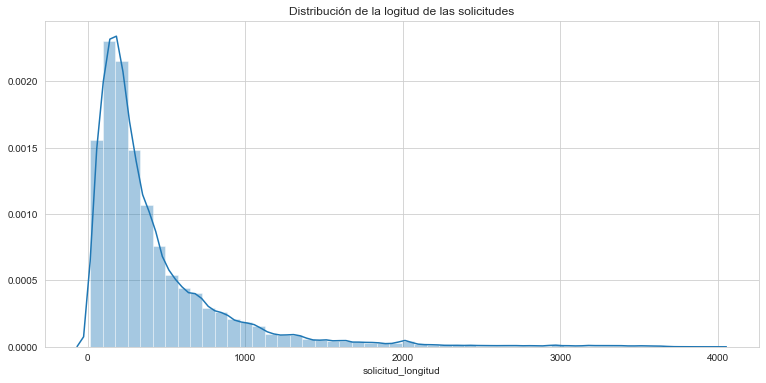

In [85]:
plt.figure(figsize=(12.8, 6))
sns.distplot(df_new['solicitud_longitud']).set_title('Distribución de la logitud de las solicitudes');

Quitaremos casos del percentil 95% para apreciar mejor la grafica.

In [86]:
q_95 = df_new['solicitud_longitud'].quantile(0.95)
q_95

1300.0

In [87]:
df_95 = df_new[df['solicitud_longitud'] < q_95]

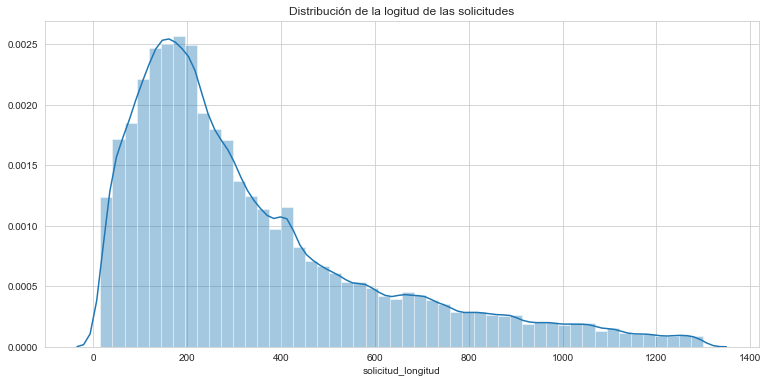

In [88]:
plt.figure(figsize=(12.8, 6))
sns.distplot(df_95['solicitud_longitud']).set_title('Distribución de la logitud de las solicitudes');

In [89]:
df_95['solicitud_longitud'].describe()

count    1.170057e+06
mean     3.411709e+02
std      2.712019e+02
min      1.600000e+01
25%      1.470000e+02
50%      2.530000e+02
75%      4.540000e+02
max      1.299000e+03
Name: solicitud_longitud, dtype: float64

Haremos un boxplot de la variable calidad_respuesta y calidad_respuesta_real para ver la distribución por separado.

**calidad_respuesta**

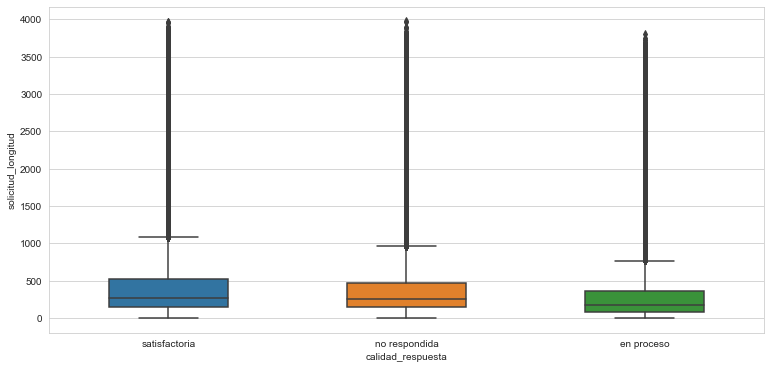

In [90]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df, x='calidad_respuesta', y='solicitud_longitud', width=.5);

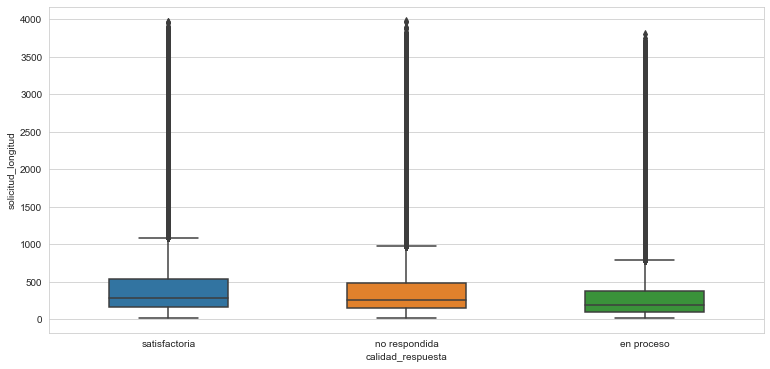

In [91]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df_new, x='calidad_respuesta', y='solicitud_longitud', width=.5);

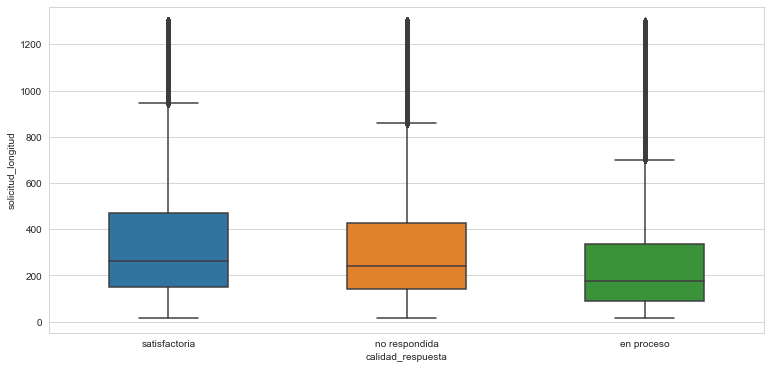

In [92]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df_95, x='calidad_respuesta', y='solicitud_longitud', width=.5);

**calidad_respuesta_real**

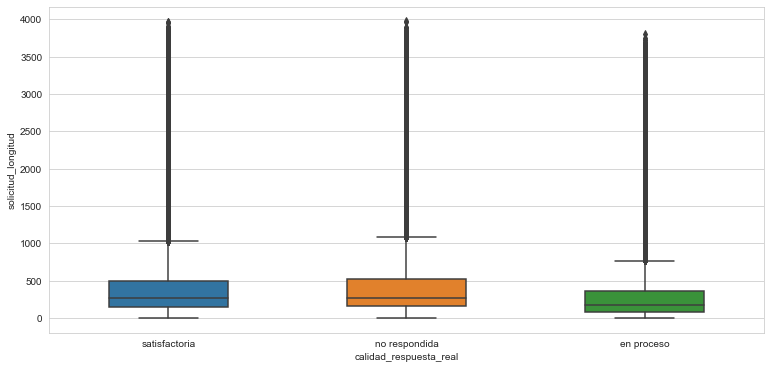

In [93]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df, x='calidad_respuesta_real', y='solicitud_longitud', width=.5);

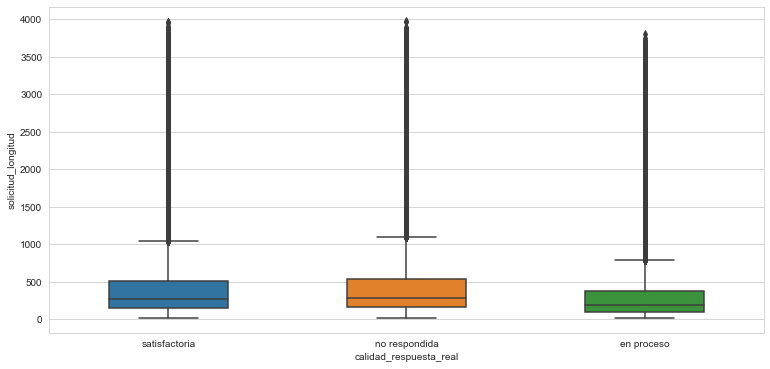

In [94]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df_new, x='calidad_respuesta_real', y='solicitud_longitud', width=.5);

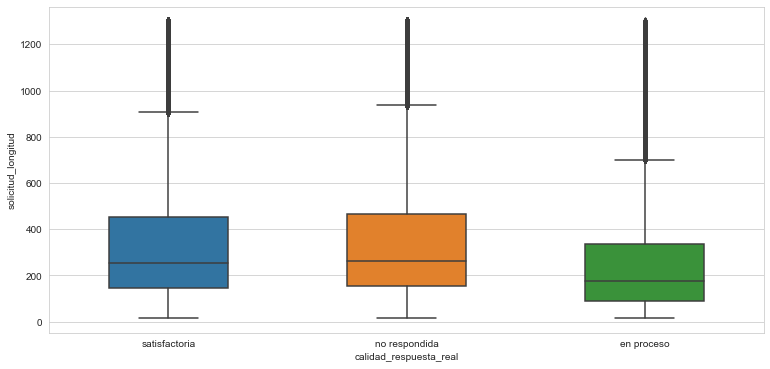

In [95]:
plt.figure(figsize=(12.8, 6))
sns.boxplot(data=df_95, x='calidad_respuesta_real', y='solicitud_longitud', width=.5);

## Veremos de nuevo el número de casos de las etiquetas calidad_respuesta y calidad_respuesta_real

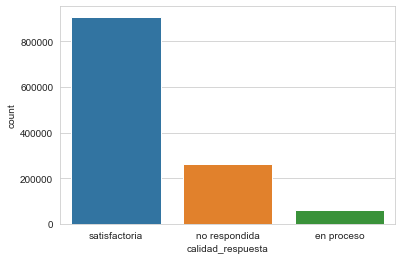

In [96]:
graph = sns.countplot(x="calidad_respuesta", data=df_new)

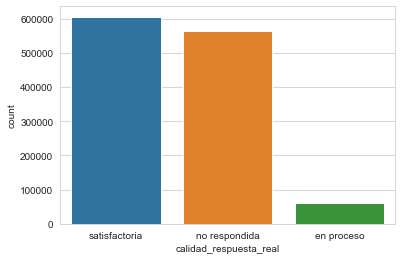

In [97]:
graph = sns.countplot(x="calidad_respuesta_real", data=df_new)

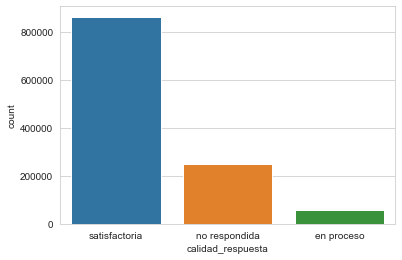

In [98]:
graph = sns.countplot(x="calidad_respuesta", data=df_95)

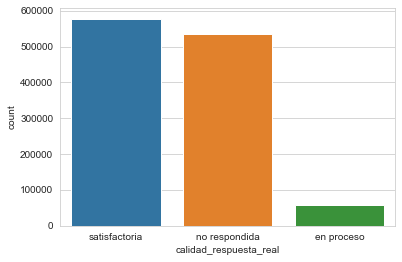

In [99]:
graph = sns.countplot(x="calidad_respuesta_real", data=df_95)

Nos quedaremos con el dataframe df_new que es al que le pusimos la condición que la descripción de la solicitud debe de tener mas de 15 caracteres.

In [100]:
grouped = df_new.groupby('calidad_respuesta_real').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta_real', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta_real,
satisfactoria,"606,211"
no respondida,"565,486"
en proceso,"60,016"


Quitaremos la categoria en proceso.

In [101]:
filtro = df_new['calidad_respuesta_real'] != 'en proceso'
df_new = df_new[filtro]

In [102]:
grouped = df_new.groupby('calidad_respuesta_real').count()[['folio']]
grouped = grouped.sort_values('calidad_respuesta_real', ascending=False)
grouped.style.format("{:,}")

,folio
calidad_respuesta_real,
satisfactoria,"606,211"
no respondida,"565,486"


# Feature Engineering

In [103]:
import spacy
import nltk
from nltk import SnowballStemmer

In [104]:
nlp = spacy.load('es_core_news_sm')

**Lematizamos, quitamos puntuación y stopwords de la lengua española**

In [105]:
def LematizarTexto(texto):
    
    doc = nlp(texto)
    words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
    lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
    lemmatized_text = ' '.join(lexical_tokens)
    
    return lemmatized_text

In [106]:
import multiprocessing
from multiprocessing.dummy import Pool as ThreadPool

In [107]:
cores = multiprocessing.cpu_count()
pool = ThreadPool(cores)
cores

12

In [108]:
df_new['descripcionsolicitud_lemma'] = pool.map(LematizarTexto, df_new['descripcionsolicitud'])
pool.close()

In [109]:
df_new.head()

,folio,fechasolicitud,dependencia,estatus,medioentrada,tiposolicitud,descripcionsolicitud,otrosdatos,archivoadjuntosolicitud,medioentrega,fechalimite,respuesta,textorespuesta,archivorespuesta,fecharespuesta,pais,estado,municipio,codigopostal,sector,tipo_archivo_respuesta,cantidad_archivos_respuesta,texto_respuesta_adjunto,respuestareal,calidad_respuesta,calidad_respuesta_real,solicitud_longitud,descripcionsolicitud_lemma
0,1857500001912,2012-01-01 05:04:07,pemex exploracion y produccion,terminada,electronica,informacion publica,copia de los documentos y los con que cuenta a...,None,None,entrega por internet en el infomex,2012-03-02,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-02,mexico,distrito federal,benito juarez,3100,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 02...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,768,copiar documento comportamiento historico tipi...
1,1857500002012,2012-01-01 05:13:16,pemex exploracion y produccion,terminada,electronica,informacion publica,del informacion y usados en la de flujo de efe...,None,None,entrega por internet en el infomex,2012-03-02,entrega de informacion en medio electronico,se anexa archivo con la respuesta a la informa...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-03-02,mexico,distrito federal,benito juarez,3100,energia,pdf,1.0,pemex exploracion y produccion oficio fecha 01...,entrega de informacion en medio electronico,satisfactoria,satisfactoria,548,informacion usar flujo efectivo pozo tipico ag...
2,0001800000712,2012-01-01 09:46:39,secretaria de energia,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,inexistencia de la informacion solicitada,el asunto se turno a la direccion general de r...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,miguel hidalgo,11230,energia,zip,2.0,None,inexistencia de la informacion solicitada,no respondida,no respondida,269,proporcionar magnetico relacion ocupar amparar...
3,0000600003712,2012-01-01 10:11:41,secretaria de hacienda y credito publico,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,la informacion esta disponible publicamente,direcci&oacute;n de internet en donde se encue...,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-02,mexico,distrito federal,miguel hidalgo,11230,hacienda y credito publico,pdf,1.0,inidos secretaria de hacienda y credito public...,la informacion esta disponible publicamente,satisfactoria,satisfactoria,269,proporcionar magnetico relacion ocupar amparar...
4,0001500002812,2012-01-01 10:32:15,secretaria de desarrollo agrario territorial y...,terminada,electronica,informacion publica,se me proporcione en magnetico y por este medi...,None,None,entrega por internet en el infomex,2012-02-02,entrega de informacion en medio electronico,None,https://www.infomex.org.mx/gobiernofederal/mod...,2012-02-01,mexico,distrito federal,miguel hidalgo,11230,reforma agraria,zip,4.0,None,sin respuesta,satisfactoria,no respondida,398,proporcionar magnetico relacion ocupar amparar...


**Codificamos etiquetas**

Creamos un diccionario con la codificación de las etiquetas.

In [110]:
codigos = {
    'satisfactoria': 0,
    'no respondida': 1
}

In [111]:
df_new['codigo_calidad_respuesta_real'] = df_new['calidad_respuesta_real']
df_new = df_new.replace({'codigo_calidad_respuesta_real':codigos})

**train - test split**

In [112]:
from sklearn.model_selection import train_test_split

temporal cross validation (investigar tempral cross validation)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(df_new['descripcionsolicitud_lemma'],
                                                   df_new['codigo_calidad_respuesta_real'],
                                                   test_size = 0.2,
                                                   random_state = 8)

**Representación de texto (TF-IDF Vectors)**

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
ngram_range = (1, 2)
min_df = 10
max_df = 1.
max_features = 300

In [121]:
tfidf = TfidfVectorizer(encoding='utf-8',
                       ngram_range=ngram_range,
                       stop_words=None,
                       lowercase=False,
                       max_df=max_df,
                       min_df=min_df,
                       max_features=max_features,
                       norm='l2',
                       sublinear_tf=True)

features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(937357, 300)
(234340, 300)


Aplicamos prueba chi cuadrada para ver que unigramas o bigramas estan mas correlacionados con cada label.

In [122]:
from sklearn.feature_selection import chi2
import numpy as np

In [135]:
for respuesta, codigo in sorted(codigos.items()):
    features_chi2 = chi2(features_train, labels_train == codigo)
    indices = np.argsort(features_chi2[0])
    features_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in features_names if len(v.split(' ')) == 1]
    bigrams = [v for v in features_names if len (v.split(' ')) == 2]
    print("# '{}' label:".format(respuesta))
    print("  . Most acorrelated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# 'no respondida' label:
  . Most acorrelated unigrams:
. medicamento
. aguar
. municipio
. ambiental
. beneficiario
  . Most correlated bigrams:
. cuadrar basico
. clavar cuadrar

# 'satisfactoria' label:
  . Most acorrelated unigrams:
. medicamento
. aguar
. municipio
. ambiental
. beneficiario
  . Most correlated bigrams:
. cuadrar basico
. clavar cuadrar



Guardamos pickles en S3

In [136]:
import boto3
import pickle

In [138]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/X_train.pkl'
pickle_byte_obj = pickle.dumps(X_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'EC8BF26021EB4AA7',
  'HostId': 'RR+OzBjNNmnWS6H/c/+KNyEAG9+4BIYMMPtYWxqRXBapnwRFFiKFd8XG6zdj3sLg6xKHz23UDEg=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'RR+OzBjNNmnWS6H/c/+KNyEAG9+4BIYMMPtYWxqRXBapnwRFFiKFd8XG6zdj3sLg6xKHz23UDEg=',
   'x-amz-request-id': 'EC8BF26021EB4AA7',
   'date': 'Mon, 20 Jul 2020 18:06:15 GMT',
   'etag': '"e25d1f79c2f705ab2110b8e257769332"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"e25d1f79c2f705ab2110b8e257769332"'}

In [139]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/X_test.pkl'
pickle_byte_obj = pickle.dumps(X_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'B1158C11481732F5',
  'HostId': 'gr9De4Coc17UyP63hpf3QB8CW5KqefZMZBrXTGarsPjrZ2i39mBBUb9E4oyGEMhkhFyrvXh84Fk=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'gr9De4Coc17UyP63hpf3QB8CW5KqefZMZBrXTGarsPjrZ2i39mBBUb9E4oyGEMhkhFyrvXh84Fk=',
   'x-amz-request-id': 'B1158C11481732F5',
   'date': 'Mon, 20 Jul 2020 18:08:25 GMT',
   'etag': '"9e6eb352e11ead7ef496507628f51844"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"9e6eb352e11ead7ef496507628f51844"'}

In [140]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/y_train.pkl'
pickle_byte_obj = pickle.dumps(y_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'D221934E4CE507A7',
  'HostId': 'q3xR1iUNFRPfszyhj2evAsaEtjfOiSMOuNpvHo2zSJABclAubXZRsK97F8FxFA5+UkLbWRM/G3E=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'q3xR1iUNFRPfszyhj2evAsaEtjfOiSMOuNpvHo2zSJABclAubXZRsK97F8FxFA5+UkLbWRM/G3E=',
   'x-amz-request-id': 'D221934E4CE507A7',
   'date': 'Mon, 20 Jul 2020 18:09:09 GMT',
   'etag': '"d4f83288fcb4495a3787b73ecb68b4ce"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"d4f83288fcb4495a3787b73ecb68b4ce"'}

In [141]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/y_test.pkl'
pickle_byte_obj = pickle.dumps(y_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': '17EF34DC950612EF',
  'HostId': 'hDr9SpuDZHF3u4qbH6ZV+jzajo99mHGvnz7OMrHiY/hnQzU4Mf3MecevuevzS9h0m+L3IalF/FY=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'hDr9SpuDZHF3u4qbH6ZV+jzajo99mHGvnz7OMrHiY/hnQzU4Mf3MecevuevzS9h0m+L3IalF/FY=',
   'x-amz-request-id': '17EF34DC950612EF',
   'date': 'Mon, 20 Jul 2020 18:09:27 GMT',
   'etag': '"513f64736ac86f01be59ec4ddc7a5994"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"513f64736ac86f01be59ec4ddc7a5994"'}

In [142]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/features_train.pkl'
pickle_byte_obj = pickle.dumps(features_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'D9D8936755C60B5F',
  'HostId': 'ZlzlXilSTYcV1gm3O7fpdjpxKWiAKaKsEMHQz9Hl5wvONXcJE7pJDniI2wjMCeanWbQafOtCMs4=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'ZlzlXilSTYcV1gm3O7fpdjpxKWiAKaKsEMHQz9Hl5wvONXcJE7pJDniI2wjMCeanWbQafOtCMs4=',
   'x-amz-request-id': 'D9D8936755C60B5F',
   'date': 'Mon, 20 Jul 2020 18:10:43 GMT',
   'etag': '"d209eee8c5f0f4d45bdbfd4d7df25b01"',
   'content-length': '0',
   'server': 'AmazonS3',
   'connection': 'close'},
  'RetryAttempts': 0},
 'ETag': '"d209eee8c5f0f4d45bdbfd4d7df25b01"'}

In [143]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/labels_train.pkl'
pickle_byte_obj = pickle.dumps(labels_train)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': '28F5595E8B65CFBA',
  'HostId': 'TkqXAkyLcb26ikRsW61SUcmPj1SHXhMN7ZaAAcS86Wddw7pzGWexQJpUnYs620U+hQRJyBb1ffI=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'TkqXAkyLcb26ikRsW61SUcmPj1SHXhMN7ZaAAcS86Wddw7pzGWexQJpUnYs620U+hQRJyBb1ffI=',
   'x-amz-request-id': '28F5595E8B65CFBA',
   'date': 'Mon, 20 Jul 2020 18:34:49 GMT',
   'etag': '"d4f83288fcb4495a3787b73ecb68b4ce"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"d4f83288fcb4495a3787b73ecb68b4ce"'}

In [144]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/features_test.pkl'
pickle_byte_obj = pickle.dumps(features_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'AE39ACBBADC817C6',
  'HostId': '3j5Ju///qumFkBhGEj9jsF6YxFpObrzkxm01OHKuYSRCYcbpC0LC0X1TQKFbEG6tK0URze+6JOc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '3j5Ju///qumFkBhGEj9jsF6YxFpObrzkxm01OHKuYSRCYcbpC0LC0X1TQKFbEG6tK0URze+6JOc=',
   'x-amz-request-id': 'AE39ACBBADC817C6',
   'date': 'Mon, 20 Jul 2020 18:35:06 GMT',
   'etag': '"b0aac63899d89c2e8aa6bc7f8c8bc3d7"',
   'content-length': '0',
   'server': 'AmazonS3',
   'connection': 'close'},
  'RetryAttempts': 0},
 'ETag': '"b0aac63899d89c2e8aa6bc7f8c8bc3d7"'}

In [145]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/labels_test.pkl'
pickle_byte_obj = pickle.dumps(labels_test)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': '2E4622F257651627',
  'HostId': 'A4tefwDw4ujBalTRfbn/Ayg4v6MZMkdkVyDTNBSl4YIlKq2ZqC1MJSLvhEq/ULJSy0fDS4HRQuU=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'A4tefwDw4ujBalTRfbn/Ayg4v6MZMkdkVyDTNBSl4YIlKq2ZqC1MJSLvhEq/ULJSy0fDS4HRQuU=',
   'x-amz-request-id': '2E4622F257651627',
   'date': 'Mon, 20 Jul 2020 18:42:11 GMT',
   'etag': '"513f64736ac86f01be59ec4ddc7a5994"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"513f64736ac86f01be59ec4ddc7a5994"'}

In [146]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/tfidf.pkl'
pickle_byte_obj = pickle.dumps(tfidf)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': 'ADA04F0BF005AAAE',
  'HostId': '8y3Ka8hcAm1WgWIdL454p3OSHFg44qi+QGxOGm49XYl7P67BrEGkLnzMvLJ1ciQ3jhlXcdn0CRk=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': '8y3Ka8hcAm1WgWIdL454p3OSHFg44qi+QGxOGm49XYl7P67BrEGkLnzMvLJ1ciQ3jhlXcdn0CRk=',
   'x-amz-request-id': 'ADA04F0BF005AAAE',
   'date': 'Mon, 20 Jul 2020 18:42:28 GMT',
   'etag': '"a91580a71bbb75ef552b1b26ce908a78"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"a91580a71bbb75ef552b1b26ce908a78"'}

In [149]:
bucket='inai-summerofdata'
key='mlpreproc/pickles/df.pkl'
pickle_byte_obj = pickle.dumps(df_new)
s3_resource = boto3.resource('s3')
s3_resource.Object(bucket, key).put(Body=pickle_byte_obj)

{'ResponseMetadata': {'RequestId': '81451003962FDA7B',
  'HostId': 'f64q05WrRwvnv4mOLNCEkfRAtc9zs9i4dGeWP3TsY/6sP+2pXLsQtI9/GaDyhj07Q7Ek9uhUhRc=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'f64q05WrRwvnv4mOLNCEkfRAtc9zs9i4dGeWP3TsY/6sP+2pXLsQtI9/GaDyhj07Q7Ek9uhUhRc=',
   'x-amz-request-id': '81451003962FDA7B',
   'date': 'Mon, 20 Jul 2020 19:53:19 GMT',
   'etag': '"41672b38d586457bcae7fb2d09d06990"',
   'content-length': '0',
   'server': 'AmazonS3',
   'connection': 'close'},
  'RetryAttempts': 0},
 'ETag': '"41672b38d586457bcae7fb2d09d06990"'}